In [1]:
#librerías
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import gadget 
import arepo


"""
===================================
    ->Lectura de los autovectores
"""

from struct import *
import sys
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/daniel/.local/lib/python3.6/site-packages/gadget-0.1-py3.6-linux-x86_64.egg/gadget/const.py:20: UserWarning: Could not setup constants
  warnings.warn("Could not setup constants")


In [2]:
Sn_bh = gadget.Snapshot('../../Data/snap_015.0.hdf5', parttype=[5])

In [3]:
"""
BLACK HOLES
"""

Spin_bh=Sn_bh.BH_SpinOrientation #Spin de los black hole
r_bh = Sn_bh.Coordinates  # cordanada en x,y,z
Mass_bh = Sn_bh.BH_Mass*10e10/0.7 ## M(sun)
vel_disp_bh = Sn_bh.SubfindVelDisp  ##km/s
#vel_bh = Sn_bh.Velocities ##km*sqrt(a)/s
Sn_bh.Coordinates

Quantity([[  631.28878196,  7531.14490752,  7167.51987284],
       [  663.85491272,  7542.56652565,  7138.94906246],
       [  690.30428576,  7601.26662394,  6818.69049836],
       [  425.63533352,  7639.22267624,  6806.7480046 ],
       [  906.20003826,  7640.45772474,  6935.2736818 ],
       [  646.87401608,  6998.73256069,  7394.17057261],
       [  993.93650611,  8200.26887895,  6837.61417368],
       [  484.42259957,  7867.15041299,  6365.62227952],
       [  281.81428513,  7482.65211167,  7506.03267541],
       [  744.4964462 ,  8051.67639877,  6365.48292827],
       [  406.18510836,  7730.22179106,  6751.77854405],
       [  638.52256114,  8112.48247954,  6252.38316511],
       [  201.31828569,  8079.92652723,  6059.52221224],
       [  653.51106685,  7557.26593193,  7018.22729886],
       [  628.24215653,  7222.33181589,  7523.21209613],
       [  538.3977704 ,  8201.9072569 ,  6213.72378394],
       [  534.99639846,  7149.22314623,  7463.37354229],
       [  478.91777964,  732

In [63]:
#Cargar los datos para 

"""
======================
Lectura de Datos 

    ---> EigenVectores
======================
"""

## Dirección archivos ##
#Direction_eigenvector='../Bolshoi/Eigenvec_s1_1'
#Direction_eigenvalor='../Bolshoi/Eigen_s1_1'



def read_eigenVec(folder,file,NumEigenVec):
    print("Reading eigenvector file")
    f = open("%s%s%s"%(folder,file,NumEigenVec), "rb")
    #f = open("../Bolshoi/Eigenvec_s1_1", "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(4)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('i', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print(n_x, n_y, n_z, nodes, dx, dy, dz)

    total_nodes = 3 * n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    new_array_data = np.reshape(array_data, (3,n_x,n_y,n_z), order='F')
    return new_array_data, n_x
    
print("--------------------\n")

#print(new_array_data[:,0,0,0])


--------------------



In [64]:
###calcular los autovelores para los radios respectivos

#r=[]
#eigen_vec_r=[]
def Eigen_vec(r,n_x):
    """
    Esta funcion retorna el valor del auntoVector 
    correspondiente a las coordenadas r(x,y,z)
    """
        
    long_box= 25e3 #longitud caja
    
    dl = n_x/long_box #tamaño de cada celda = numero_celdas/long_caja
    
    i=np.int(r[0]*dl)
    j=np.int(r[1]*dl)
    k=np.int(r[2]*dl)
    
   
    

    """
    eigen_vec_r =np.array([new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]])
    """

    eigen_vec_r = [new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]]

       
    
    #return r[0],r[1],r[2]
    return eigen_vec_r


In [34]:
## asignacion de autovectores con su radio respectivo
"""
Mag_EigenVec=[]
Mag_Spin_bh=[]
Dot=[]
EigenVec=[]
cos_theta=[]
for i in range(len(r_bh)):
    
    #Enviroment=np.append(Enviroment,[Eigen_vec(r_bh[i])])
    #New_enviroment=reshape(Enviroment,(1,n_x))
    EigenVec.append(Eigen_vec(r_bh[i]))
    
    Mag_EigenVec.append(np.linalg.norm(EigenVec[i])) ##magnitud del autovector
    Mag_Spin_bh.append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh
    Dot.append(np.vdot(EigenVec[i],Spin_bh[i]))      ##Productopunto del autovec y spin_bh
    cos_theta.append(Dot[i]/(Mag_EigenVec[i]*Mag_Spin_bh[i])) 
    

#print(Mag_Enviroment[0])    

print(cos_theta)
"""

'\nMag_EigenVec=[]\nMag_Spin_bh=[]\nDot=[]\nEigenVec=[]\ncos_theta=[]\nfor i in range(len(r_bh)):\n    \n    #Enviroment=np.append(Enviroment,[Eigen_vec(r_bh[i])])\n    #New_enviroment=reshape(Enviroment,(1,n_x))\n    EigenVec.append(Eigen_vec(r_bh[i]))\n    \n    Mag_EigenVec.append(np.linalg.norm(EigenVec[i])) ##magnitud del autovector\n    Mag_Spin_bh.append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh\n    Dot.append(np.vdot(EigenVec[i],Spin_bh[i]))      ##Productopunto del autovec y spin_bh\n    cos_theta.append(Dot[i]/(Mag_EigenVec[i]*Mag_Spin_bh[i])) \n    \n\n#print(Mag_Enviroment[0])    \n\nprint(cos_theta)\n'

Reading eigenvector file
64 64 64 262144 195.3125 390.625 390.625
counter =  0
/home/daniel/Documentos/Tesis/Data/Tweb_512/snap_015.s1.00.eigenvec_0
Reading eigenvector file
64 64 64 262144 195.3125 390.625 390.625
counter =  21
/home/daniel/Documentos/Tesis/Data/Tweb_512/snap_015.s1.00.eigenvec_21
Reading eigenvector file
64 64 64 262144 195.3125 390.625 390.625
counter =  42
/home/daniel/Documentos/Tesis/Data/Tweb_512/snap_015.s1.00.eigenvec_42


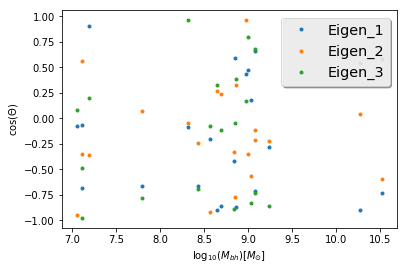

In [91]:

## asignacion de autovectores con su radio respectivo
"""
Mag_EigenVec = [[Mag_EigenVec1],[Mag_EigenVec2],[Mag_EigenVec3]]
Mag_Spin_bh = [[Mag_Spin_bh1],[Mag_Spin_bh2],[Mag_Spin_bh]]
Dot= [[Dot1],[Dot2],[Dot3]]
EigenVec= [[EigenVec1],[EigenVec2],[EigenVec3]]
cos_theta = []
"""
Mag_EigenVec = []
Mag_Spin_bh = []
Dot= []
EigenVec= []
cos_theta = []




#NumEigenVec = "1" 

folder = '/home/daniel/Documentos/Tesis/Data/Tweb_512/'
file = 'snap_015.s1.00.eigenvec_'

plt.figure()


counter = 0
Q=1
for j in range(0,3):
    
    
    new_array_data, n_x = read_eigenVec(folder,file,"%s"%(Q))
    print("counter = ",counter)
    print("%s%s%s"%(folder,file, counter))
    
    for i in range(len(r_bh)):

        #Enviroment=np.append(Enviroment,[Eigen_vec(r_bh[i])])
        #New_enviroment=reshape(Enviroment,(1,n_x))
        """
        EigenVec[j].append(Eigen_vec(r_bh[i],n_x))
        Mag_EigenVec[j].append(np.linalg.norm(EigenVec[j][i])) ##magnitud del autovector
        Mag_Spin_bh[j].append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh
        Dot[j].append(np.vdot(EigenVec[j][i],Spin_bh[i]))      ##Productopunto del autovec y spin_bh
        cos_theta.append(Dot[j][i]/(Mag_EigenVec[j][i]*Mag_Spin_bh[j][i])) 
        """
        
        EigenVec.append(Eigen_vec(r_bh[i],n_x))
        Mag_EigenVec.append(np.linalg.norm(EigenVec[counter])) ##magnitud del autovector
        Mag_Spin_bh.append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh
        Dot.append(np.vdot(EigenVec[counter],Spin_bh[i]))      ##Productopunto del autovec y spin_bh
        cos_theta.append(Dot[counter]/(Mag_EigenVec[counter]*Mag_Spin_bh[counter])) 
        counter=counter+1
    Q=Q+1
    
    
#print(EigenVec)
cos_theta = np.reshape(cos_theta,(3,len(r_bh)))    

#print(cos_theta[1])
#print(cos_theta[0])

plt.plot(np.log10(Mass_bh),cos_theta[0],'.', label='Eigen_1')

plt.plot(np.log10(Mass_bh),cos_theta[1],'.', label='Eigen_2')

plt.plot(np.log10(Mass_bh),cos_theta[2],'.', label='Eigen_3')
plt.xlabel('$\log_{10}(M_{bh})[M_{\odot}]$')
plt.ylabel('$\cos( \Theta ) $')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.savefig('Alinacion_Enviroment_bh.png')

    

#print(Mag_Enviroment[0])    



In [59]:
### GRAFICA
"""
plt.plot(np.log10(Mass_bh),cos_theta,'.')
plt.xlabel('$\log_{10}(M_{bh})[M_{\odot}]$')
plt.ylabel('$\cos( \Theta ) $')
plt.savefig('Alinacion_Enviroment_bh.png')
"""



"\nplt.plot(np.log10(Mass_bh),cos_theta,'.')\nplt.xlabel('$\\log_{10}(M_{bh})[M_{\\odot}]$')\nplt.ylabel('$\\cos( \\Theta ) $')\nplt.savefig('Alinacion_Enviroment_bh.png')\n"

In [60]:
Mag_EigenVec = [[23]]*3
#Mag_EigenVec = [[1,4,5,6],[2,10,0,12],[3,54,34,19]]
#Mag_EigenVec=np.reshape(Mag_EigenVec,(1,3))
#for i in range(4):
print(Mag_EigenVec[:][2])

[23]


In [77]:
EigenVec= [[]]*3
print(EigenVec)


[[], [], []]
